In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

from sklearn.model_selection import cross_val_score

In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("data/diabetes.csv", header=None, names=col_names)
feature_names = col_names[:-1]
# print(type(df))
print(df.head())
# print(df.info())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [9]:
#split dataset in features and target variable
X = df.drop("label", axis='columns')
y = df.label
# print(X.shape)
# print(y.shape)

In [10]:
# Split inot 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [12]:


for d in range(1,16) :
    model = DecisionTreeClassifier(max_depth=d)
    
    scores = cross_val_score(model, X_train, y_train, cv=5)
#     print(scores)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  1 Accuracy: 0.7150398061613015
Depth:  2 Accuracy: 0.7206645898234683
Depth:  3 Accuracy: 0.7113014884042922
Depth:  4 Accuracy: 0.7243856005538248
Depth:  5 Accuracy: 0.6854101765316718
Depth:  6 Accuracy: 0.6890100380754587
Depth:  7 Accuracy: 0.6796296296296296
Depth:  8 Accuracy: 0.6741259951540325
Depth:  9 Accuracy: 0.6814987885081343
Depth:  10 Accuracy: 0.6796642436829352
Depth:  11 Accuracy: 0.6685531325718241
Depth:  12 Accuracy: 0.6703357563170647
Depth:  13 Accuracy: 0.6759432329525786
Depth:  14 Accuracy: 0.659190031152648
Depth:  15 Accuracy: 0.6573208722741434


In [13]:
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train,y_train)

print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.8044692737430168
Test Accuracy: 0.7619047619047619


In [7]:
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[123  23]
 [ 32  53]]

TN 123 FP 23 FN 32 TP 53


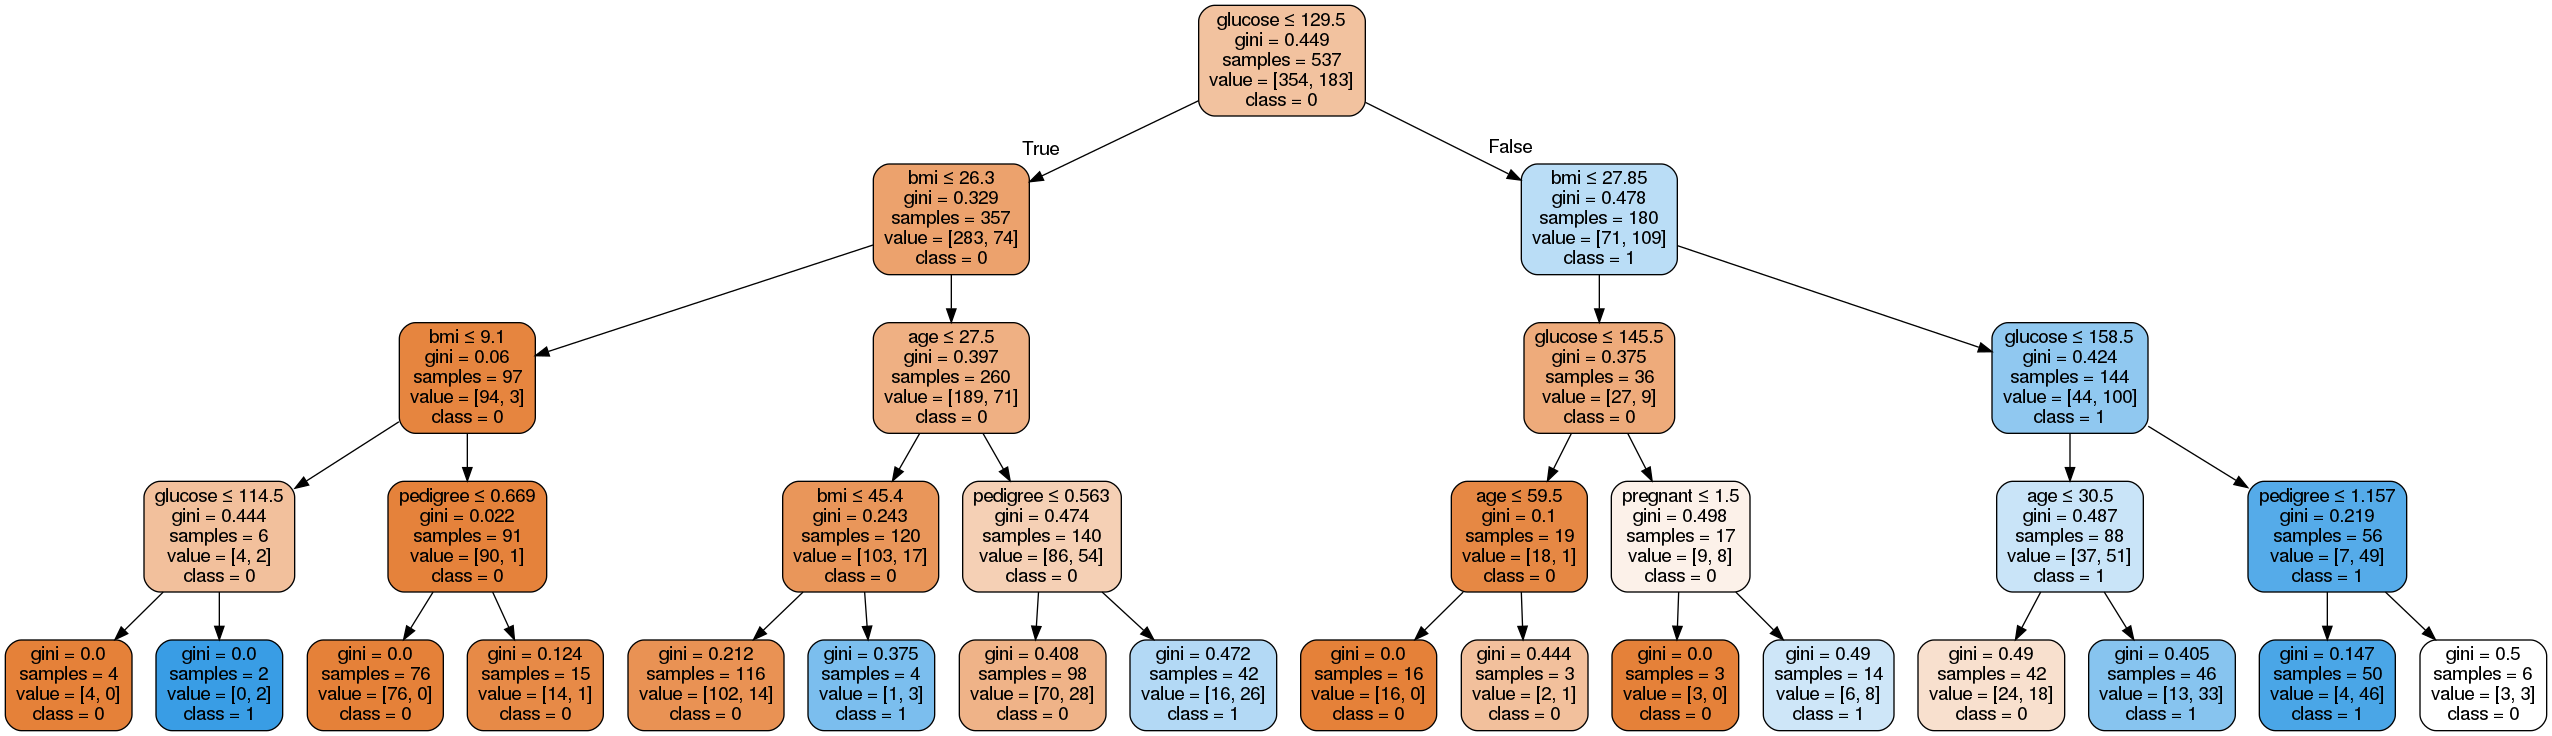

In [9]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/diabetes.png')
Image(graph.create_png())